In [1]:
import os
import numpy as np
import matplotlib

In [9]:
rootp = '../multistage/'
name_lst = ['multistage_converge','multistage_gn16','multistage_gn16_v2']
ilst = ['i0','i1','i2']
all_dict = {}
for n in name_lst:
    all_dict[n] = {}
    for i in ilst:
        all_dict[n][i] = {}
        all_dict[n][i]['dir'] = os.path.join(rootp,n,i)
        all_dict[n][i]['data'] = []
for n in name_lst:
    for i in ilst:
        for k in range(1,13):
            temp = np.load(os.path.join(all_dict[n][i]['dir'],'report_{}.npz'.format(k)))['fid']
            all_dict[n][i]['data'].append(temp)
for n in name_lst:
    for i in ilst:
        all_dict[n][i]['data'] = np.array(all_dict[n][i]['data'])

print(all_dict)

{'multistage_converge': {'i0': {'dir': '../multistage/multistage_converge/i0', 'data': array([10.426245 ,  5.8893757,  4.289719 ,  3.679725 ,  3.3538334,
        3.053771 ,  2.9423656,  2.9047806,  2.830003 ,  2.7886362,
        2.7792497,  2.8195765], dtype=float32)}, 'i1': {'dir': '../multistage/multistage_converge/i1', 'data': array([3.0130033, 2.8954084, 2.8305426, 2.8140392, 2.7868996, 2.7906327,
       2.7397428, 2.7304382, 2.7300923, 2.74801  , 2.6764147, 2.782639 ],
      dtype=float32)}, 'i2': {'dir': '../multistage/multistage_converge/i2', 'data': array([2.8624809, 2.9553888, 2.7252223, 2.7522209, 2.7174335, 2.714384 ,
       2.6202297, 2.6616368, 2.7090096, 2.7203565, 2.6669033, 2.6883445],
      dtype=float32)}}, 'multistage_gn16': {'i0': {'dir': '../multistage/multistage_gn16/i0', 'data': array([10.383302 ,  5.9512563,  4.2970595,  3.6688178,  3.234236 ,
        3.0724206,  2.9971735,  2.8801801,  2.899957 ,  2.841134 ,
        2.8081675,  2.830474 ], dtype=float32)}, 'i1'

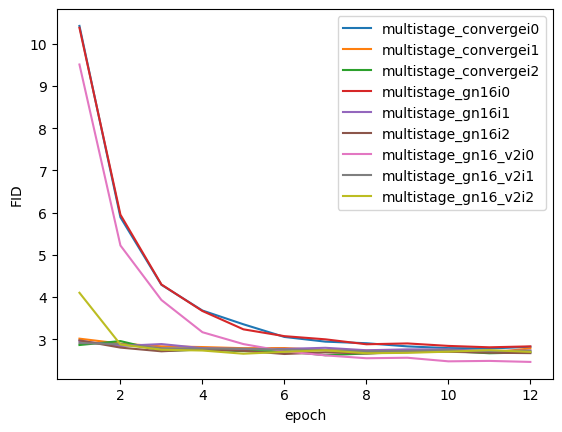

In [11]:
import matplotlib.pyplot as plt

y = list(range(1,13))
"""for k in ddpm_dict.keys():
    plt.plot(y,ddpm_dict[k],label=k)"""
for n in name_lst:
    for i in ilst:
        plt.plot(y,all_dict[n][i]['data'],label=n+i)

plt.legend()
#plt.xlabel("10k training iterations")
plt.xlabel("epoch")
plt.ylabel("FID")
#plt.title("All timestep vs interval timestep")
plt.show()

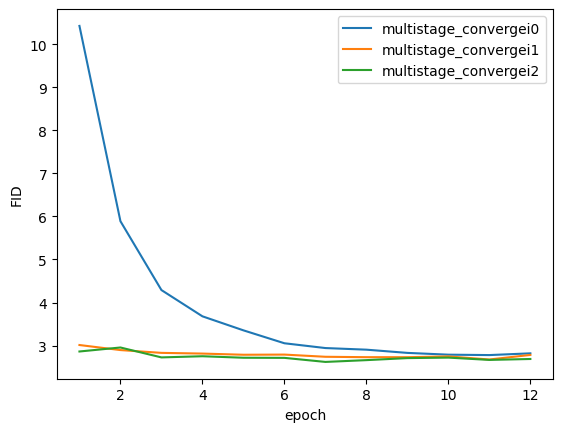

In [12]:
import matplotlib.pyplot as plt

y = list(range(1,13))
"""for k in ddpm_dict.keys():
    plt.plot(y,ddpm_dict[k],label=k)"""
n = 'multistage_converge'
for i in ilst:
    plt.plot(y,all_dict[n][i]['data'],label=n+i)

plt.legend()
#plt.xlabel("10k training iterations")
plt.xlabel("epoch")
plt.ylabel("FID")
#plt.title("All timestep vs interval timestep")
plt.show()

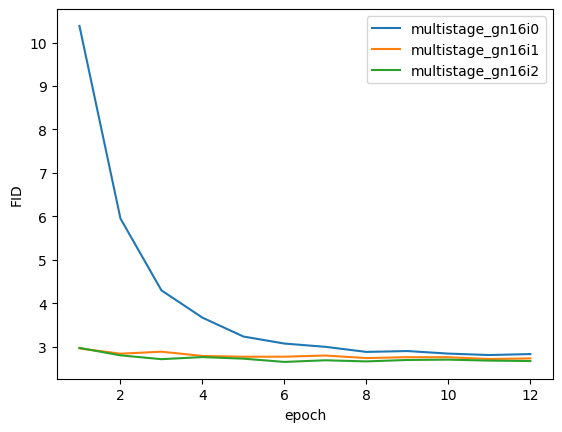

In [13]:
import matplotlib.pyplot as plt

y = list(range(1,13))
"""for k in ddpm_dict.keys():
    plt.plot(y,ddpm_dict[k],label=k)"""
n = 'multistage_gn16'
for i in ilst:
    plt.plot(y,all_dict[n][i]['data'],label=n+i)

plt.legend()
#plt.xlabel("10k training iterations")
plt.xlabel("epoch")
plt.ylabel("FID")
#plt.title("All timestep vs interval timestep")
plt.show()

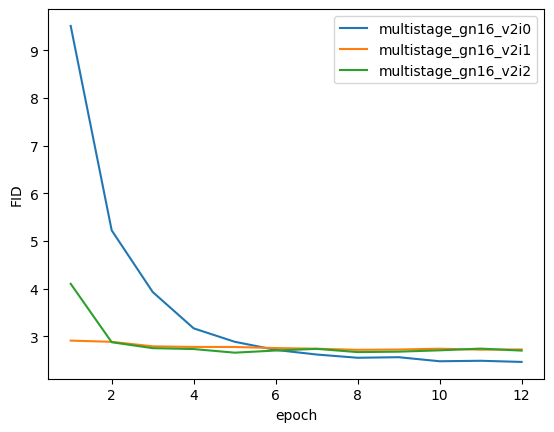

In [14]:
import matplotlib.pyplot as plt

y = list(range(1,13))
"""for k in ddpm_dict.keys():
    plt.plot(y,ddpm_dict[k],label=k)"""
n = 'multistage_gn16_v2'
for i in ilst:
    plt.plot(y,all_dict[n][i]['data'],label=n+i)

plt.legend()
#plt.xlabel("10k training iterations")
plt.xlabel("epoch")
plt.ylabel("FID")
#plt.title("All timestep vs interval timestep")
plt.show()